In [1]:
%cd /mnt/c/Users/runzh/OneDrive/Documents/2025/Graphormer-GD/dataset

/mnt/c/Users/runzh/OneDrive/Documents/2025/Graphormer-GD/dataset


/home/roger/miniforge3/envs/Graphormer-GD/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch_geometric.data import Data
import networkx as nx

In [3]:
import matplotlib as mpl
def set_style():
    """set_style"""
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams['font.sans-serif'] = 'Arial'
    # If Arial did not show up:
    # 1) install Microsoft fonts: sudo apt-get install ttf-mscorefonts-installer
    # 2) clear local cache: fc-cache -f -v && rm -r .cache/matplotlib/*
    # 3) restart Python environment
    mpl.rcParams["text.color"] = "black"
    mpl.rcParams["axes.labelcolor"] = "black"
    mpl.rcParams["axes.edgecolor"] = "black"
    mpl.rcParams["axes.labelcolor"] = "black"
    mpl.rcParams["xtick.color"] = "black"
    mpl.rcParams["ytick.color"] = "black"
    mpl.rcParams["xtick.major.size"] = 2.5
    mpl.rcParams["ytick.major.size"] = 2.5
    mpl.rcParams["xtick.minor.size"] = 2.0
    mpl.rcParams["ytick.minor.size"] = 2.0

    mpl.rcParams["xtick.major.width"] = 0.45
    mpl.rcParams["ytick.major.width"] = 0.45
    mpl.rcParams["xtick.minor.width"] = 0.45
    mpl.rcParams["ytick.minor.width"] = 0.45
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['xtick.major.pad'] = 1
    mpl.rcParams['ytick.major.pad'] = 1
    mpl.rcParams['xtick.minor.pad'] = 1
    mpl.rcParams['ytick.minor.pad'] = 1

    mpl.rcParams["axes.edgecolor"] = "black"
    mpl.rcParams["axes.linewidth"] = 0.45
    mpl.rcParams["font.size"] = 8
    mpl.rcParams["axes.labelsize"] = 8
    mpl.rcParams["axes.titlesize"] = 8
    mpl.rcParams["figure.titlesize"] = 8
    mpl.rcParams["figure.titlesize"] = 8
    mpl.rcParams["legend.fontsize"] = 6
    mpl.rcParams["legend.title_fontsize"] = 8
    mpl.rcParams["xtick.labelsize"] = 6
    mpl.rcParams["ytick.labelsize"] = 6
set_style()

In [4]:
# Model accuracy
ks  = [
    1,
    2,
    3,
    4,
    5,
    7,
    10,
    'inf'
]
khop_accs = np.array([
    [0.458, 0.4605, 0.4589],
    [0.0613, 0.0563, 0.0609],
    [0.0534, 0.0546, 0.0557],
    [0.0533, 0.0516, 0.0557],
    [0.0542, 0.0542, 0.0568],
    [0.0532, 0.0524, 0.0543],
    [0.0524, 0.0534, 0.0536],
    [0.0581, 0.0588, 0.0577],
])

khop_gd_accs = np.array([
    [0.4684, 0.4689, 0.4641],
    [0.0498, 0.0479, 0.0433],
    [0.0443, 0.0451, 0.0446],
    [0.0417, 0.0398, 0.0425],
    [0.0418, 0.0401, 0.0423],
    [0.0441, 0.0392, 0.0441],
    [0.0450, 0.0414, 0.0455],
    [0.0417, 0.0441, 0.0443],
])

In [5]:
khop_accs.mean(axis=-1), khop_accs.std(axis=-1), khop_gd_accs.mean(axis=-1), khop_gd_accs.std(axis=-1)

(array([0.45913333, 0.0595    , 0.05456667, 0.05353333, 0.05506667,
        0.0533    , 0.05313333, 0.0582    ]),
 array([0.00103387, 0.00226863, 0.00093927, 0.00168193, 0.00122565,
        0.00077889, 0.00052493, 0.00045461]),
 array([0.46713333, 0.047     , 0.04466667, 0.04133333, 0.0414    ,
        0.04246667, 0.04396667, 0.04336667]),
 array([0.00215458, 0.00272886, 0.00032998, 0.00113235, 0.00094163,
        0.00230988, 0.00182635, 0.00118134]))

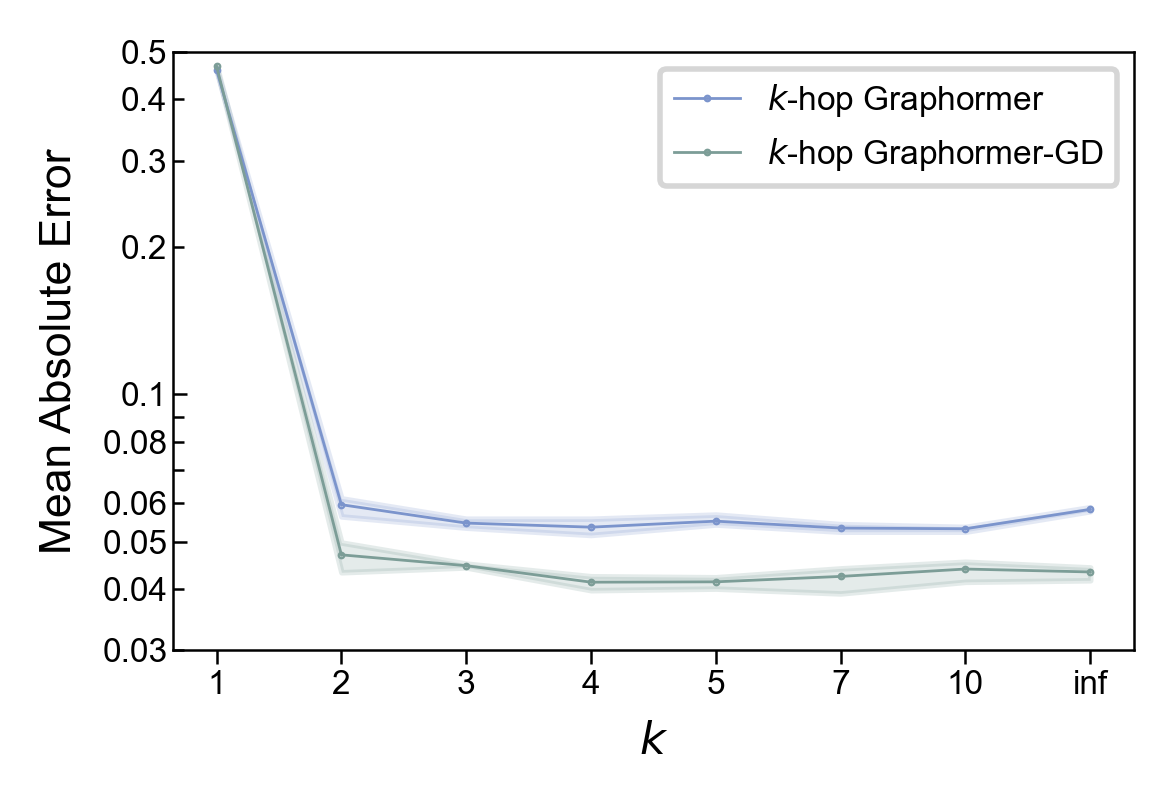

In [6]:
fig = plt.figure(
    figsize=(3.1, 2.2), dpi=400
)
ax1 = plt.gca()

# Axis1, accuracy

ax1.plot(
    np.arange(len(ks)),
    khop_accs.mean(axis=-1),
    color='#7B94CC',
    linewidth=0.5,
    marker='.',
    markersize=0.8,
    label='$k$-hop Graphormer'
)

ax1.fill_between(
    np.arange(len(ks)),
    khop_accs.min(axis=-1),
    khop_accs.max(axis=-1),
    alpha=0.2,
    color='#7B94CC',
)

ax1.plot(
    np.arange(len(ks)),
    khop_gd_accs.mean(axis=-1),
    color='#7C9D97',
    linewidth=0.5,
    marker='.',
    markersize=0.8,
    label='$k$-hop Graphormer-GD'
)

ax1.fill_between(
    np.arange(len(ks)),
    khop_gd_accs.min(axis=-1),
    khop_gd_accs.max(axis=-1),
    alpha=0.2,
    color='#7C9D97',
)

ax1.xaxis.set_ticks(np.arange(len(ks)))
ax1.set_xticklabels(ks)
ax1.set_xlabel("$k$")
ax1.set_ylabel("Mean Absolute Error")
ax1.set_yscale('log')
ax1.set_ylim(0.03, 0.5)
ax1.yaxis.set_ticks([0.05, 0.1, 0.5])
ax1.set_yticklabels([0.05, 0.1, 0.5])
ax1.yaxis.set_ticks([0.03, 0.04, 0.06, 0.07, 0.08, 0.09, 0.2, 0.3, 0.4], minor=True)
ax1.set_yticklabels([0.03, 0.04, 0.06, None, 0.08, None, 0.2, 0.3, 0.4], minor=True)
ax1.legend()
# fig.subplots_adjust(left=0.2)
fig.subplots_adjust(bottom=0.2)
plt.savefig('zinc-full-mae.pdf')

In [7]:
# Dataset statistics
data, indices = torch.load('full/processed/test.pt')

In [8]:
def get_single_graph(data, indices, i):
    """
    Extract the i-th graph from the large concatenated Data object
    given the indices dictionary.
    """
    # 1. Nodes: slice from indices['x'][i] to indices['x'][i+1]
    x_start, x_end = indices['x'][i].item(), indices['x'][i+1].item()
    x_i = data.x[x_start:x_end]

    # 2. Edges: slice from indices['edge_index'][i] to indices['edge_index'][i+1]
    e_start, e_end = indices['edge_index'][i].item(), indices['edge_index'][i+1].item()
    edge_index_i = data.edge_index[:, e_start:e_end] - x_start
    edge_attr_i = data.edge_attr[e_start:e_end]

    # 3. (Optional) Additional fields, e.g. 'res_pos', if relevant
    #    Use the same approach: slice [res_start : res_end]
    res_start, res_end = indices['res_pos'][i].item(), indices['res_pos'][i+1].item()
    res_pos_i = data.res_pos[res_start:res_end]

    # 4. Targets: for y, it appears each graph corresponds to a single scalar
    #    so just pick y[i]
    y_i = data.y[i]

    # 5. Return a brand new Data object with the relevant slices
    return Data(
        x=x_i,
        edge_index=edge_index_i,
        edge_attr=edge_attr_i,
        y=y_i,
        res_pos=res_pos_i
    )


In [9]:
num_graphs = len(indices['y']) - 1  # or just len(data.y) if each graph = 1 label
cycle_lens = []
for i in range(num_graphs):
    # Get the i-th graph as a Pytorch Geometric Data object
    single_graph = get_single_graph(data, indices, i)

    # Now build a NetworkX graph to compute stats:
    G = nx.Graph()
    # Add edges from single_graph.edge_index
    edges_np = single_graph.edge_index.cpu().numpy()
    for src, dst in edges_np.T:
        G.add_edge(int(src), int(dst))

    # Optionally add node attributes, etc.
    # Then compute your desired statistics:
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    cycles = [len(cyc) for cyc in nx.simple_cycles(G)]
    max_cycle_len = max(cycles) if len(cycles) > 0 else 0
    cycle_lens.append(max_cycle_len)

    # print(f"Graph {i}: #nodes={num_nodes}, #edges={num_edges}, max_cycle={max_cycle_len}")


In [10]:
cycle_len_keys, cycle_len_cnts = [], []
for val in sorted(np.unique(cycle_lens)):
    cycle_len_keys.append(val)
    cycle_len_cnts.append(cycle_lens.count(val))


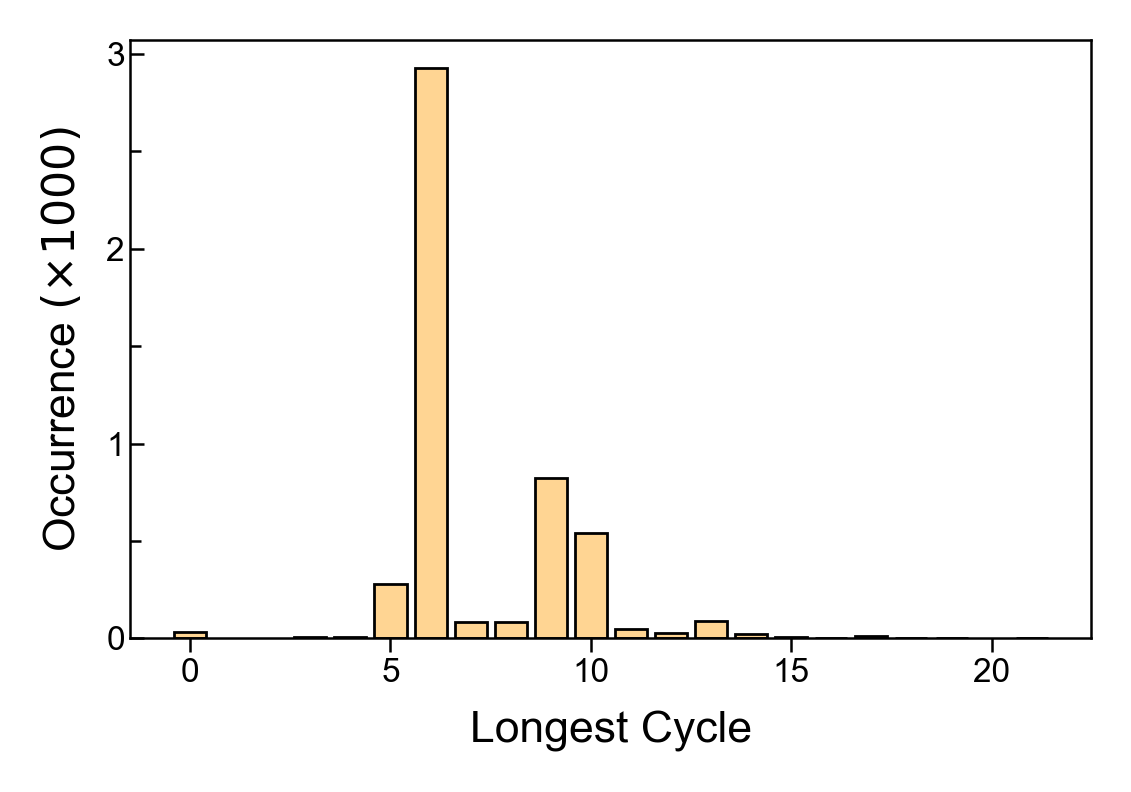

In [11]:
fig = plt.figure(
    figsize=(3.1, 2.2), dpi=400
)
ax1 = plt.gca()
ax1.bar(
        cycle_len_keys,
        cycle_len_cnts,
        color='#FFD593',
        edgecolor="black",
        linewidth=0.5,
        capsize=1.5,
        error_kw=dict(lw=0.5, capsize=1.5, capthick=0.5),
    )
ax1.set_ylabel("Occurrence $(\\times 1000)$")
ax1.set_xlabel("Longest Cycle")
ax1.yaxis.set_ticks([0, 1000, 2000, 3000])
ax1.yaxis.set_ticks([500, 1500, 2500], minor=True)
ax1.set_yticklabels([0, '1', '2', '3'])
# fig.subplots_adjust(left=0.2)
fig.subplots_adjust(bottom=0.2)
plt.savefig('zinc-full-cycle.pdf')